# 导入所需的库
导入必要的库，例如 pandas、matplotlib、seaborn、nltk 和 scikit-learn。

In [1]:
# 导入所需的库
import pandas as pd  # 用于数据处理
import matplotlib.pyplot as plt  # 用于数据可视化
import seaborn as sns  # 用于高级数据可视化
from nltk.sentiment import SentimentIntensityAnalyzer  # 用于情感分析
from sklearn.feature_extraction.text import CountVectorizer  # 用于文本特征提取
from sklearn.model_selection import train_test_split  # 用于数据集拆分
from sklearn.naive_bayes import MultinomialNB  # 用于分类任务
from sklearn.metrics import classification_report, confusion_matrix  # 用于评估模型性能

# 确保 NLTK 的资源已下载
import nltk
nltk.download('vader_lexicon')  # 下载情感分析所需的词典

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\12914\AppData\Roaming\nltk_data...


True

# 加载数据集
使用 pandas 加载 CSV 数据集。

In [3]:
# 加载数据集
file_path = "../data/new_found/无人驾驶网约车评论数据.csv"  # 替换为实际的文件路径
data = pd.read_csv(file_path, encoding="utf-8")  # 加载 CSV 数据集

# 查看数据集的前几行
data.head()

,视频标题,作者,态度,语调,形式,内容,时长,评论,点赞数,回复数,评论时间,用户来源,用户id,用户名,用户签名,IP
0,3块钱体验无人驾驶网约车，科技的进步让天方夜谭成为现实。,@体德学院校长李维刚,中立,严肃,体验、对话,科技发展、失业问题,170,不是说长沙没有无人驾驶网约车吗？怎么又有了。,0,0,2024-10-06 20:32:17,homepage_hot,2367425883,黑玫瑰,四十岁的人二十岁的心。,湖南
1,3块钱体验无人驾驶网约车，科技的进步让天方夜谭成为现实。,@体德学院校长李维刚,中立,严肃,体验、对话,科技发展、失业问题,170,我们武汉的勺萝卜无人驾驶里面就没人[捂脸][捂脸][捂脸],3,4,2024-07-10 12:41:25,homepage_hot,888021411,游子David,搬砖兄弟：,湖北
2,3块钱体验无人驾驶网约车，科技的进步让天方夜谭成为现实。,@体德学院校长李维刚,中立,严肃,体验、对话,科技发展、失业问题,170,以后我要买一部这样的车，早上送我去上班，然后它自己跑滴滴去，晚上来接我下班。没电自己找充电桩...,4909,753,2024-07-09 17:37:11,others_homepage,108690482,🧊今天肯定不熬夜,随意记录,湖南
3,3块钱体验无人驾驶网约车，科技的进步让天方夜谭成为现实。,@体德学院校长李维刚,中立,严肃,体验、对话,科技发展、失业问题,170,萝卜快跑能不能卖的，我想买一辆，我上班载我去，下班接我回，白天我上班期间它自个跑滴滴去，我晚...,40,14,2024-07-11 10:42:53,homepage_hot,350600771,我想我会一直孤独,咱就静悄悄的干，输了呢就当没干过😁😁,河南
4,3块钱体验无人驾驶网约车，科技的进步让天方夜谭成为现实。,@体德学院校长李维刚,中立,严肃,体验、对话,科技发展、失业问题,170,只有武汉的就是真正的无人驾驶,3,6,2024-07-10 15:43:05,homepage_hot,573950974,温柔吖,人民有信仰，民族有希望，国家有力量。,湖北


# 数据预处理
清理和预处理文本数据，包括删除停用词、标点符号和词干提取。

In [5]:
# 数据预处理
import re
import jieba
import pandas as pd
import nltk

# 加载中文停用词表
def load_stopwords():
    # 常用中文停用词列表 (如果需要可以从外部文件加载更完整的停用词表)
    stopwords = set(['的', '了', '在', '是', '我', '有', '和', '就',
                    '不', '人', '都', '一', '一个', '上', '也', '很',
                    '到', '说', '要', '去', '你', '会', '着', '没有',
                    '看', '好', '自己', '这'])
    return stopwords

# 定义一个函数用于清理和预处理中文文本数据
def preprocess_chinese_text(text):
    if not isinstance(text, str):
        return ""
    
    # 删除标点符号和特殊字符
    text = re.sub(r'[^\w\s]', '', text)
    
    # 使用jieba进行中文分词
    words = jieba.cut(text)
    
    # 加载停用词
    stop_words = load_stopwords()
    
    # 过滤停用词
    filtered_words = [word for word in words if word not in stop_words and word.strip()]
    
    # 将处理后的单词重新组合为字符串
    return ' '.join(filtered_words)

# 对评论列进行预处理
data['评论_预处理'] = data['评论'].apply(preprocess_chinese_text)

# 查看预处理后的数据
data[['评论', '评论_预处理']].head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\12914\AppData\Local\Temp\jieba.cache
Loading model cost 0.576 seconds.
Prefix dict has been built successfully.


,评论,评论_预处理
0,不是说长沙没有无人驾驶网约车吗？怎么又有了。,不是 长沙 无人驾驶 网约车 吗 怎么 又
1,我们武汉的勺萝卜无人驾驶里面就没人[捂脸][捂脸][捂脸],我们 武汉 勺 萝卜 无人驾驶 里面 没人 捂 脸 捂 脸 捂 脸
2,以后我要买一部这样的车，早上送我去上班，然后它自己跑滴滴去，晚上来接我下班。没电自己找充电桩...,以后 我要 买 一部 这样 车 早上 送 上班 然后 它 跑 滴滴 晚上 来接 下班 没 电...
3,萝卜快跑能不能卖的，我想买一辆，我上班载我去，下班接我回，白天我上班期间它自个跑滴滴去，我晚...,萝卜 快 跑 能 不能 卖 想 买 一辆 上班 载 下班 接 回 白天 上班 期间 它 自个...
4,只有武汉的就是真正的无人驾驶,只有 武汉 就是 真正 无人驾驶


# 探索性数据分析 (EDA)
执行 EDA 以了解评论数据的分布、趋势和关系。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75012 entries, 0 to 75011
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   视频标题    75012 non-null  object
 1   作者      75012 non-null  object
 2   态度      75012 non-null  object
 3   语调      75012 non-null  object
 4   形式      75012 non-null  object
 5   内容      75012 non-null  object
 6   时长      75012 non-null  int64 
 7   评论      75012 non-null  object
 8   点赞数     75012 non-null  int64 
 9   回复数     75012 non-null  int64 
 10  评论时间    75012 non-null  object
 11  用户来源    75012 non-null  object
 12  用户id    75012 non-null  int64 
 13  用户名     75012 non-null  object
 14  用户签名    36952 non-null  object
 15  IP      75012 non-null  object
 16  评论_预处理  75012 non-null  object
dtypes: int64(4), object(13)
memory usage: 9.7+ MB
缺失值统计：
 视频标题          0
作者            0
态度            0
语调            0
形式            0
内容            0
时长            0
评论            0
点赞数           0
回复数 

C:\Users\12914\AppData\Local\Temp\ipykernel_21624\1466077215.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='态度', order=data['态度'].value_counts().index, palette='viridis')
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  fig.canva

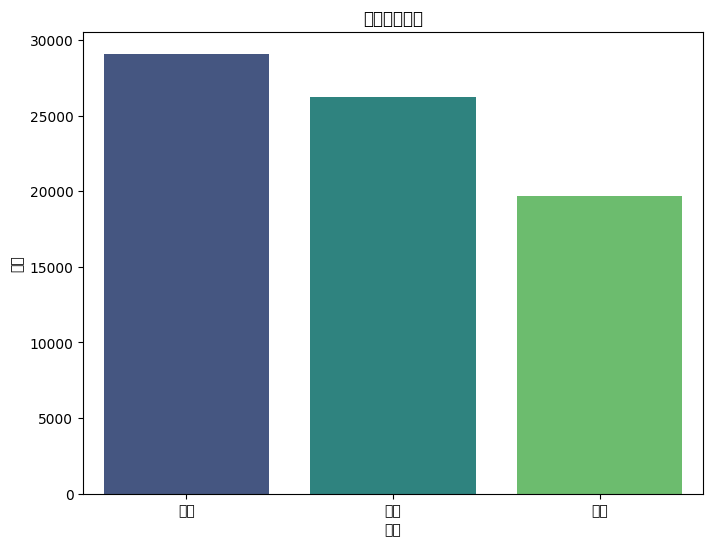

c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtoo

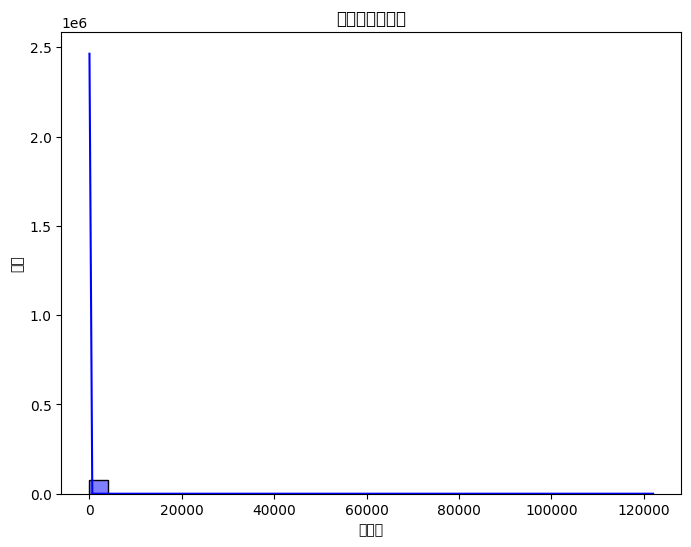

c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36190 (\N{CJK UNIFIED IDEOGRAPH-8D5E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtoo

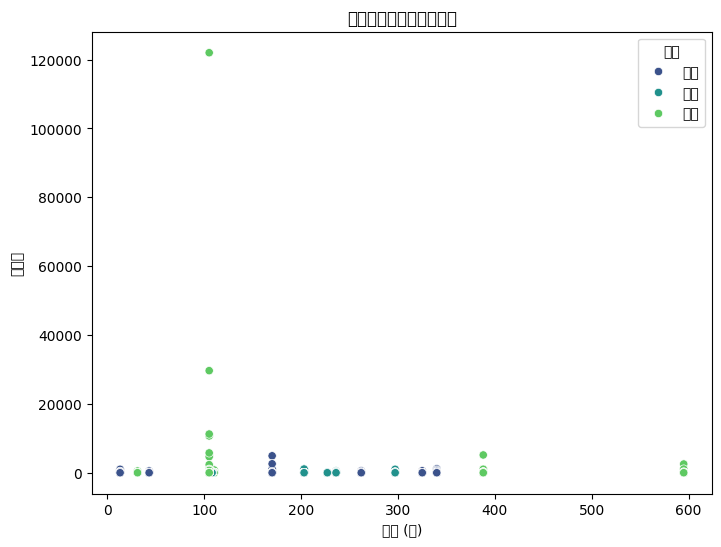

c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtoo

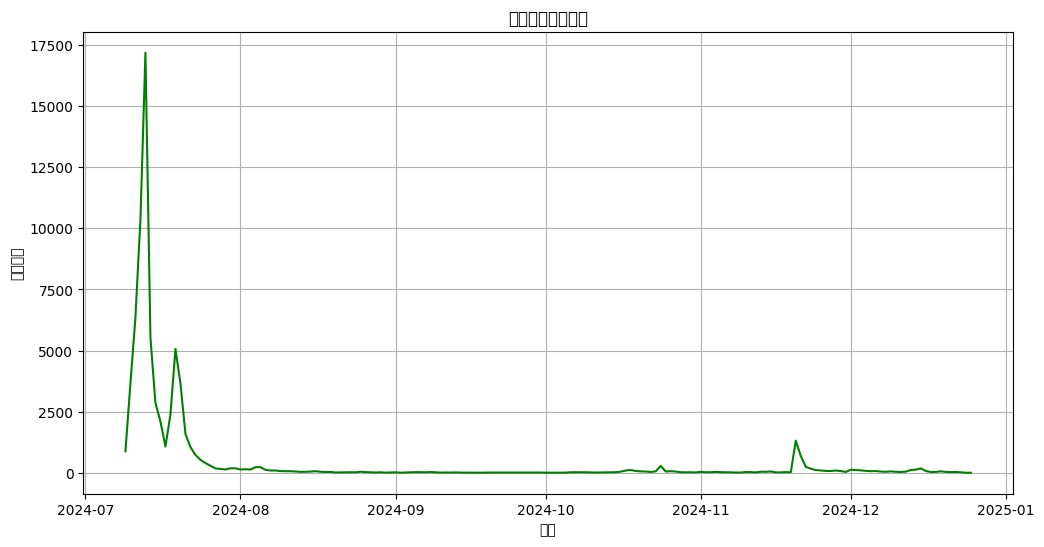

C:\Users\12914\AppData\Local\Temp\ipykernel_21624\1466077215.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='用户来源', order=data['用户来源'].value_counts().index, palette='coolwarm')
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from font(s) DejaVu Sans.
  fig.

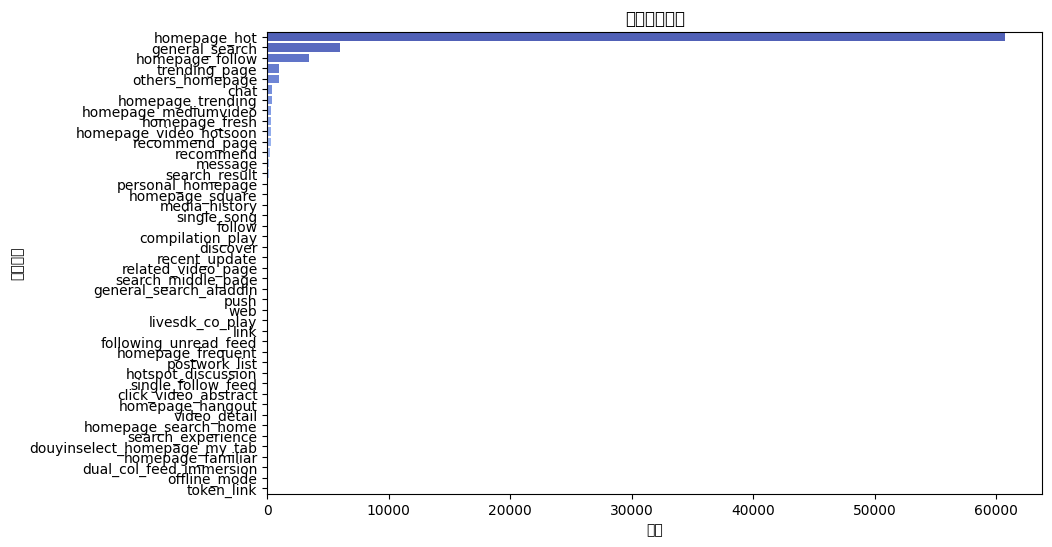

In [6]:
# 探索性数据分析 (EDA)

# 查看数据集的基本信息
data.info()

# 检查是否存在缺失值
missing_values = data.isnull().sum()
print("缺失值统计：\n", missing_values)

# 描述性统计分析
print("描述性统计：\n", data.describe(include='all'))

# 评论态度的分布可视化
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='态度', order=data['态度'].value_counts().index, palette='viridis')
plt.title('评论态度分布')
plt.xlabel('态度')
plt.ylabel('数量')
plt.show()

# 评论点赞数的分布
plt.figure(figsize=(8, 6))
sns.histplot(data['点赞数'], bins=30, kde=True, color='blue')
plt.title('评论点赞数分布')
plt.xlabel('点赞数')
plt.ylabel('频率')
plt.show()

# 评论时长与点赞数的关系
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='时长', y='点赞数', hue='态度', palette='viridis')
plt.title('评论时长与点赞数的关系')
plt.xlabel('时长 (秒)')
plt.ylabel('点赞数')
plt.legend(title='态度')
plt.show()

# 评论时间的分布
data['评论时间'] = pd.to_datetime(data['评论时间'])  # 转换为日期时间格式
data['评论日期'] = data['评论时间'].dt.date  # 提取日期
plt.figure(figsize=(12, 6))
data['评论日期'].value_counts().sort_index().plot(kind='line', color='green')
plt.title('评论日期分布趋势')
plt.xlabel('日期')
plt.ylabel('评论数量')
plt.grid()
plt.show()

# 用户来源的分布
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='用户来源', order=data['用户来源'].value_counts().index, palette='coolwarm')
plt.title('用户来源分布')
plt.xlabel('数量')
plt.ylabel('用户来源')
plt.show()

# 情感分析
使用情感分析技术来确定评论的情感极性（正面、负面或中性）。

C:\Users\12914\AppData\Local\Temp\ipykernel_21624\1464600739.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='情感极性', order=['正面', '中性', '负面'], palette='coolwarm')
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12914\anaconda3\envs\policy_analyse\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

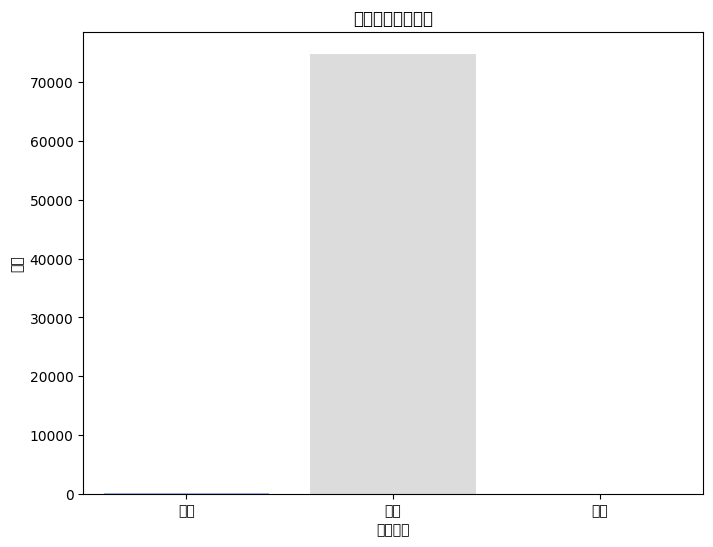

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

# 初始化情感分析器
sia = SentimentIntensityAnalyzer()

# 定义一个函数用于计算情感得分
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] > 0.05:
        return '正面'
    elif sentiment_score['compound'] < -0.05:
        return '负面'
    else:
        return '中性'

# 对评论列进行情感分析
data['情感极性'] = data['评论_预处理'].apply(analyze_sentiment)

# 查看情感分析结果
data[['评论', '评论_预处理', '情感极性']].head()

# 情感极性分布可视化
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='情感极性', order=['正面', '中性', '负面'], palette='coolwarm')
plt.title('评论情感极性分布')
plt.xlabel('情感极性')
plt.ylabel('数量')
plt.show()

# 主题建模
应用主题建模技术（例如 LDA）来发现评论中讨论的主要主题。

网约车体验: 主题 1: 现在, 便宜, 百度, 人类, 时候, 国家, 老百姓, 社会, 技术, 不了
产业经济影响: 主题 2: 出租车, 无人驾驶, 司机, 网约车, 资本, 我们, 上路, 交警, 师傅, 安全
萝卜快跑服务: 主题 3: xd, 以后, 中国, 乘客, 不用, 还要, 上车, 取消, 高科技, 车上
安全监管: 主题 4: 无人, 科技, 不能, 驾驶, 不会, 工作, 发展, 无人驾驶, 以后, ai
社会影响: 主题 5: 支持, 无人驾驶, 知道, 有人, 需要, 行业, 你们, 不会, 他们, 汽车
科技发展: 主题 6: 萝卜, 应该, 问题, 这种, 感谢, 司机, 要是, 很多, 武汉, 真的


C:\Users\12914\AppData\Local\Temp\ipykernel_21624\2170204942.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')


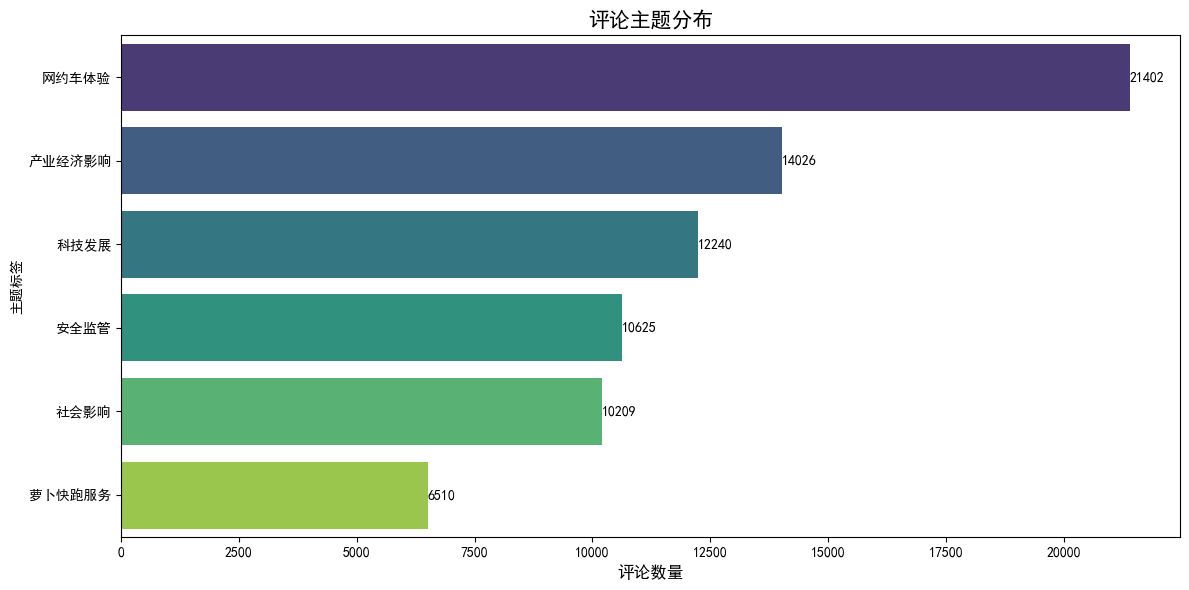


网约车体验的代表性评论:
1. 这个就像滴滴打车一样，出来的时候各种补贴，感觉很便宜，等人适应了就各种涨价
2. 现在是便宜点，等干倒所有人工出租后试试，跟滴滴开始一样
3. 现在是便宜点，等干倒所有人工出租后试试，跟滴滴开始一样

产业经济影响的代表性评论:
1. [大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑][大笑]
2. @[赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][赞][玫瑰][玫瑰][玫瑰][玫瑰][玫瑰][玫瑰][玫瑰...
3. 这是把人往死里逼啊[绝望的凝视][绝望的凝视][绝望的凝视][绝望的凝视][绝望的凝视]

萝卜快跑服务的代表性评论:
1. 谁给的？_x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000...
2. 扛楼排行榜！_x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x0...
3. 2017网恋被骗3000_x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x000D__x00...

安全监管的代表性评论:
1. [爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心]...
2. [赞][赞][赞][赞][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心][送心][送心][送心][送心]...
3. 无人滴滴，无人货拉拉，无人客车，无人轮船，无人飞机，无人外卖员，无人快递员，无人超市，无人商店，无人饭馆，让后就无人了

社会影响的代

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 进一步扩展的中文停用词列表
def load_comprehensive_stopwords():
    # 基本停用词
    stopwords = set(['的', '了', '在', '是', '我', '有', '和', '就',
                     '不', '人', '都', '一', '一个', '上', '也', '很',
                     '到', '说', '要', '去', '你', '会', '着', '没有',
                     '看', '好', '自己', '这', '那', '这个', '那个',
                     '啊', '吧', '呢', '哦', '呀', '嗯', '哈', '吗', '呵', '嘿', '喂', 
                     '哎', '哇', '嘛', '唉', '呀', '噢', '喔', '呐', '哟', '嗨', '呦', '咦'])
    
    # 表情符号文本和特殊字符
    emoji_special = set(['微笑', '流泪', '捂脸', '比心', '鼓掌', '哈哈哈', '赞赞', '赞赞赞',
                        'x000d', '__', '\\n', '\\r', '\\t', '→', '←', '↑', '↓', '♂', '♀',
                        '★', '☆', '♡', '♥', '☞', '☜', '☝', '☟', '◎', '◇', '◆', '□', '■'])
    
    # 常用副词、连词和介词
    common_words = set(['可以', '不是', '就是', '什么', '怎么', '如果', '这样', '那样', '还是', 
                       '为什么', '谁知道', '如何', '怎么办', '还有', '但是', '然后', '所以', '因为',
                       '虽然', '尽管', '即使', '只有', '只是', '只要', '那么', '而且', '并且', '不过',
                       '况且', '而是', '不仅', '并', '或', '或者', '不然', '否则', '其实', '其中',
                       '当然', '可是', '其实', '反而', '起来', '一样', '一直', '一定', '一般', 
                       '一旦', '一些', '甚至', '于是', '这些', '那些', '之后', '之前', '之所以'])
    
    # 无人驾驶讨论中常出现但不含特定情感或观点的词
    domain_common = set(['出来', '看看', '一下', '不要', '是不是', '这么', 
                         '多少', '几个', '感觉', '干嘛'])
    
    # 合并所有停用词
    return stopwords.union(emoji_special).union(common_words).union(domain_common)

# 改进的文本预处理函数
def comprehensive_preprocess_chinese_text(text):
    if not isinstance(text, str):
        return ""
    
    # 删除标点符号、特殊字符和数字
    text = re.sub(r'[^\w\s]|[\d]', '', text)
    
    # 使用jieba进行中文分词
    words = jieba.cut(text)
    
    # 加载综合停用词表
    stop_words = load_comprehensive_stopwords()
    
    # 过滤停用词和短词(长度为1的词通常信息量小)
    filtered_words = [word for word in words if word not in stop_words and len(word.strip()) > 1]
    
    # 将处理后的单词重新组合为字符串
    return ' '.join(filtered_words)

# 重新应用预处理
data['评论_优化预处理'] = data['评论'].apply(comprehensive_preprocess_chinese_text)

# 使用 CountVectorizer - 调整参数
vectorizer = CountVectorizer(max_df=0.85,  # 降低最大文档频率阈值，过滤出现在太多文档中的词
                           min_df=3,     # 保持最小文档频率
                           max_features=1000)  # 限制特征数量
text_data = data['评论_优化预处理'].fillna('')
text_matrix = vectorizer.fit_transform(text_data)

# 主题模型 - 调整参数
lda = LatentDirichletAllocation(
    n_components=6,     
    random_state=42,
    max_iter=60,        # 增加迭代次数
    learning_method='online',
    n_jobs=-1,          # 使用所有CPU核心
    learning_offset=50  # 调整学习参数
)
lda.fit(text_matrix)

# 提取特征名称
feature_names = vectorizer.get_feature_names_out()

# 显示主题词
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(f"主题 {topic_idx + 1}: {', '.join(topic_keywords)}")
    return topics

# 主题标签映射
topic_labels = {
    0: "网约车体验",
    1: "产业经济影响", 
    2: "萝卜快跑服务",
    3: "安全监管",
    4: "社会影响",
    5: "科技发展"
}

# 显示主题关键词
no_top_words = 10
topics = display_topics(lda, feature_names, no_top_words)

# 打印带标签的主题关键词
for i, topic in enumerate(topics):
    print(f"{topic_labels[i]}: {topic}")

# 为每条评论分配主题
topic_probs = lda.transform(text_matrix)
data['主题'] = topic_probs.argmax(axis=1)
data['主题标签'] = data['主题'].map(lambda x: topic_labels[x])

# 可视化主题分布
plt.figure(figsize=(12, 6))
topic_counts = data['主题标签'].value_counts()

# 创建横向条形图
ax = sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')
plt.title('评论主题分布', fontsize=15)
plt.xlabel('评论数量', fontsize=12)
plt.tight_layout()

# 在每个条形末端添加数值
for i, v in enumerate(topic_counts.values):
    ax.text(v + 0.5, i, str(v), va='center')

plt.show()

# 提取每个主题的代表性评论示例
def get_representative_docs(data, topic_probs, n=3):
    topic_docs = {}
    for topic_idx in range(topic_probs.shape[1]):
        # 获取主题概率最高的n个文档
        top_doc_indices = topic_probs[:, topic_idx].argsort()[-n:][::-1]
        topic_docs[topic_idx] = data.iloc[top_doc_indices]['评论'].tolist()
    return topic_docs

# 获取每个主题的代表性评论
representative_docs = get_representative_docs(data, topic_probs)

# 打印每个主题的代表性评论
for topic_idx, docs in representative_docs.items():
    print(f"\n{topic_labels[topic_idx]}的代表性评论:")
    for i, doc in enumerate(docs, 1):
        print(f"{i}. {doc[:100]}..." if len(doc) > 100 else f"{i}. {doc}")

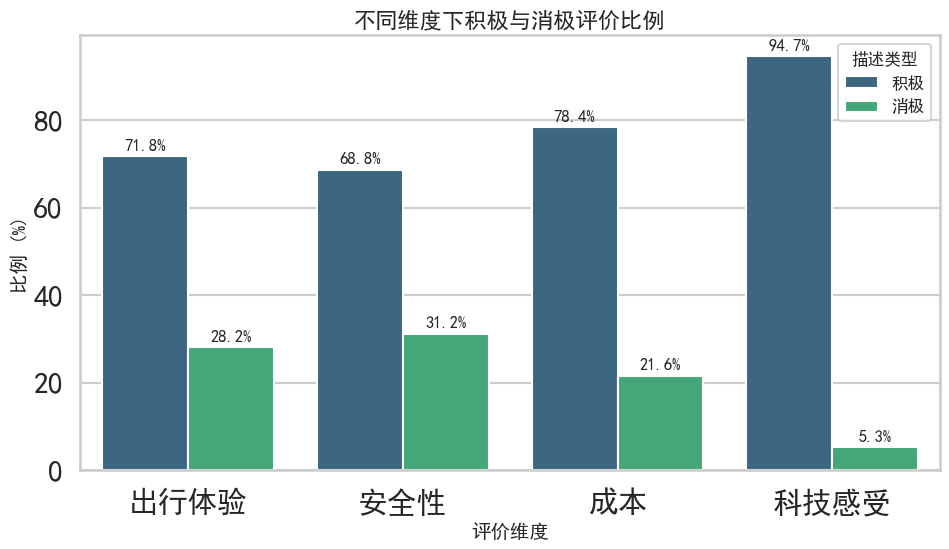

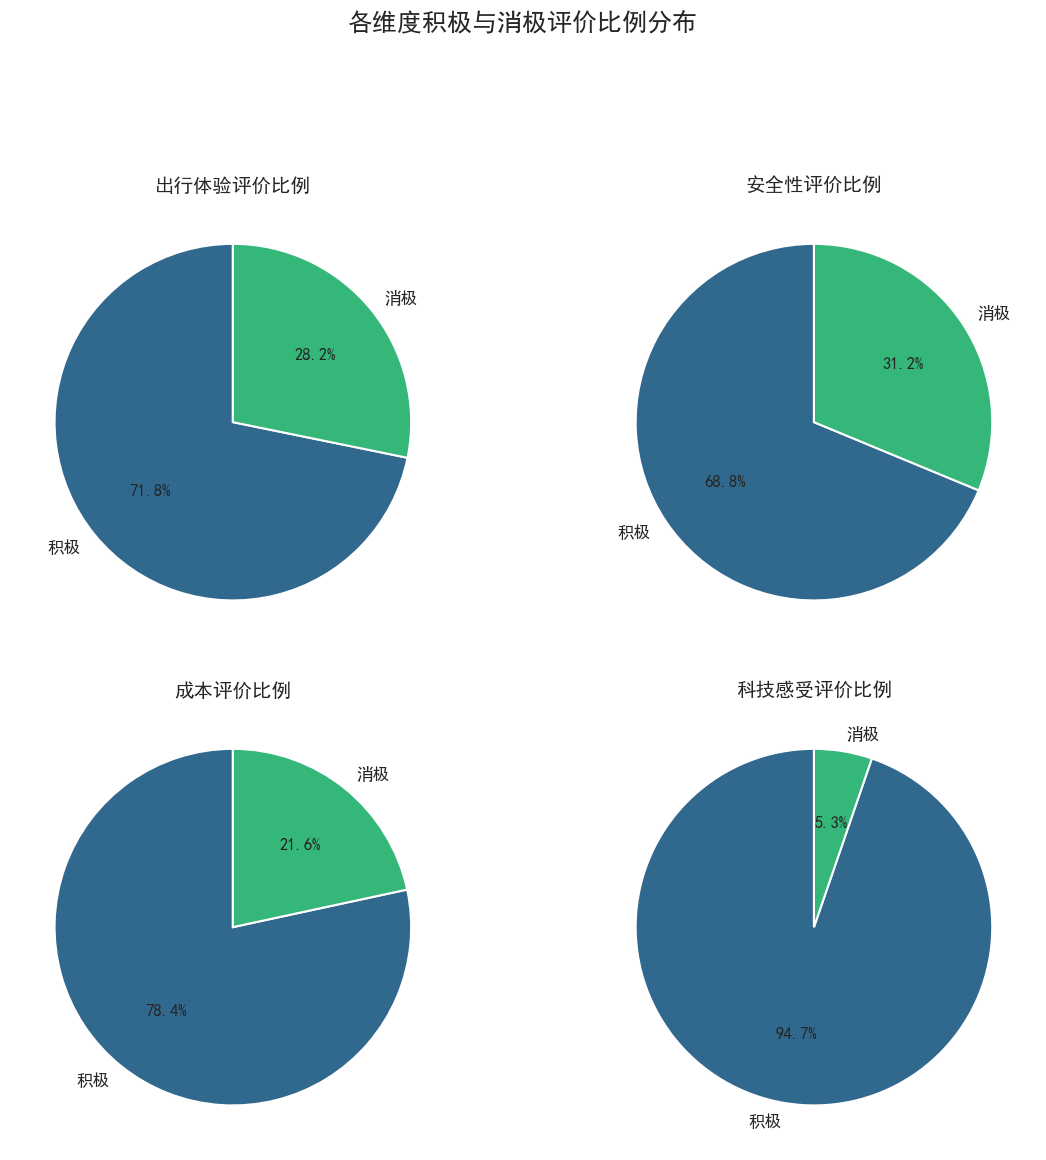

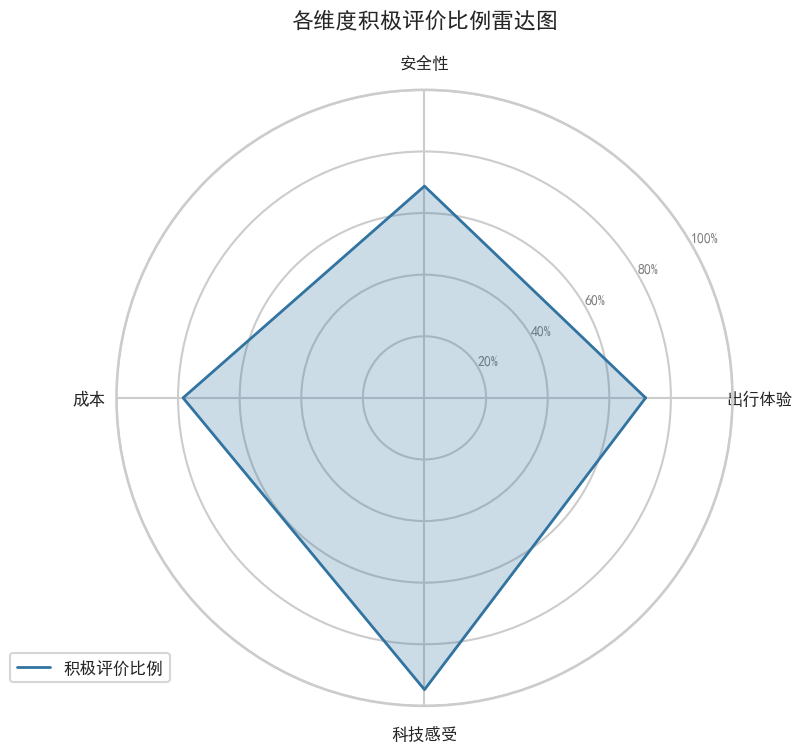

========== 分析结论 ==========
出行体验: 总评价=39条, 积极描述=28条 (71.8%), 消极描述=11条 (28.2%).
安全性: 总评价=32条, 积极描述=22条 (68.8%), 消极描述=10条 (31.2%).
成本: 总评价=74条, 积极描述=58条 (78.4%), 消极描述=16条 (21.6%).
科技感受: 总评价=19条, 积极描述=18条 (94.7%), 消极描述=1条 (5.3%).

总体来看：
1. 数据显示公众对无人驾驶网约车在各维度的反馈存在明显差异，积极评价比例的差异反映了用户关注重点。
2. 较高的积极比例暗示该维度获得正面反馈较多，而积极比例低的维度存在改进空间。
3. 雷达图直观展示了各维度积极评价的分布，为决策者改进服务和技术提供了指导意义。
以上图表和统计数据为进一步分析用户行为和市场策略提供了量化依据。


In [24]:
import os
import pandas as pd
import re
import jieba
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

# 设置中文字体和允许负号显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 可选：加载自定义词典（若存在）
# jieba.load_userdict('custom_dict.txt')

# 读取数据集（请确保CSV文件路径正确）
df = pd.read_csv('../data/new_found/无人驾驶网约车评论数据.csv')

# 筛选出评论中包含“萝卜快跑”的行
df_radish = df[df['评论'].str.contains('萝卜快跑', na=False)]

# ----------------------------
# 定义各维度关键词列表
experience_keywords = [
    '舒适', '不舒适', '难受', '舒坦', '颠簸', '平稳', '宽敞', '狭窄', 
    '座椅柔软', '座椅硬', '空间大', '空间小', '靠背角度合适', '靠背角度不适',
    '腿部空间充足', '腿部空间局促', '头部空间高', '头部空间低', '坐垫透气性好',
    '坐垫闷热', '扶手舒适', '扶手硌人', '车内气味宜人', '车内有怪味',
    '便捷', '方便', '麻烦', '繁琐', '轻松', '费劲', '容易叫车', '叫车难',
    '等待时间短', '等待时间长', '上下车方便', '上下车麻烦', '接送点准确',
    '接送点偏差大', '路线规划合理', '路线规划绕路', '叫车流程简单', '叫车流程复杂',
    '支付便捷', '支付麻烦', '切换车辆类型容易', '切换车辆类型困难',
    '服务好', '服务差', '态度热情', '态度冷淡', '沟通顺畅', '沟通困难',
    '准时', '不准时', '误点', '按时到达', '响应速度快', '响应速度慢',
    '反馈及时', '反馈不及时', '解决问题高效', '解决问题拖沓', '客服态度好',
    '客服态度差', '投诉处理及时', '投诉处理慢', '提供增值服务',
    '干净', '整洁', '脏乱', '有异味', '空气清新', '噪音大', '安静', '温度适宜',
    '温度过高', '温度过低', '光线明亮', '光线昏暗', '车窗视野好', '车窗视野受阻',
    '车内装饰美观', '车内装饰丑陋', '遮阳效果好', '遮阳效果差', '车内娱乐丰富',
    '车内娱乐匮乏'
]

safety_keywords = [
    '安全', '危险', '可靠', '不可靠', '安心', '担心', '放心', '不放心', '有保障', '没保障',
    '紧急制动灵敏', '紧急制动迟缓', '避险能力强', '避险能力弱', '应对突发状况好', '应对突发状况差',
    '雨雪天气行驶稳定', '雨雪天气易打滑', '夜间行驶安全', '夜间行驶有隐患', '通过复杂路段安全',
    '通过复杂路段危险', '应对行人灵活', '应对行人笨拙', '避让车辆及时', '避让车辆迟缓',
    '处理路口情况好', '处理路口情况差',
    '安全设备齐全', '安全设备缺失', '安全带舒适', '安全带勒人', '安全气囊正常', '安全气囊故障',
    '刹车性能好', '刹车性能差', '灯光照明充足', '灯光照明不足', '倒车影像清晰', '倒车影像模糊',
    '胎压监测正常', '胎压监测故障', '防抱死系统有效', '防抱死系统失灵', '车身稳定系统可靠',
    '车身稳定系统不可靠'
]

cost_keywords = [
    '便宜', '贵', '价格合理', '价格过高', '价格过低', '收费公道', '收费贵', '性价比高', '性价比低',
    '比XX便宜', '比XX贵', '与XX相比划算', '与XX相比不值', '同等价位更好', '同等价位较差',
    '优惠多', '优惠少', '折扣力度大', '折扣力度小', '会员划算', '会员不划算',
    '首单优惠大', '首单优惠小', '节日优惠多', '节日优惠少', '套餐划算', '套餐不划算'
]

tech_keywords = [
    '科技感', '先进', '落后', '智能化', '高科技', '低科技', '前沿技术', '传统技术', '创新', '守旧',
    '导航精准', '导航偏差大', '自动驾驶流畅', '自动驾驶卡顿', '智能交互友好', '智能交互迟钝',
    '语音识别准确', '语音识别差', '面部识别快速', '面部识别缓慢', '手势控制灵敏', '手势控制不灵',
    '自动泊车成功', '自动泊车失败', '远程操控方便', '远程操控困难',
    '车联网功能强大', '车联网功能弱', '智能调度高效', '智能调度低效', '智能充电便捷',
    '智能充电麻烦', '疲劳监测有效', '疲劳监测无效'
]

# ----------------------------
# 初始化各维度积极与消极描述数量
experience_positive = 0
experience_negative = 0
safety_positive = 0
safety_negative = 0
cost_positive = 0
cost_negative = 0
tech_positive = 0
tech_negative = 0

# 遍历每条评论，对各维度关键词进行匹配统计
for comment in df_radish['评论']:
    words = list(jieba.cut(comment, cut_all=False))
    # 出行体验匹配
    for keyword in experience_keywords:
        if keyword in words:
            positive_words = ['舒适', '便捷', '方便', '舒坦', '平稳', '宽敞',
                              '座椅柔软', '空间大', '轻松', '容易叫车', '等待时间短', 
                              '上下车方便', '服务好', '态度热情', '沟通顺畅', '准时',
                              '按时到达', '干净', '整洁', '空气清新', '安静',
                              '靠背角度合适', '腿部空间充足', '头部空间高', '接送点准确',
                              '路线规划合理', '响应速度快', '反馈及时', '解决问题高效',
                              '温度适宜', '光线明亮', '车窗视野好', '坐垫透气性好',
                              '扶手舒适', '车内气味宜人', '叫车流程简单', '支付便捷',
                              '切换车辆类型容易', '客服态度好', '投诉处理及时',
                              '提供增值服务', '车内装饰美观', '遮阳效果好', '车内娱乐丰富']
            if keyword in positive_words:
                experience_positive += 1
            else:
                experience_negative += 1
    # 安全性匹配
    for keyword in safety_keywords:
        if keyword in words:
            positive_words = ['安全', '可靠', '安心', '放心', '有保障', 
                              '紧急制动灵敏', '避险能力强', '应对突发状况好',
                              '安全设备齐全', '安全带舒适', '安全气囊正常',
                              '雨雪天气行驶稳定', '夜间行驶安全', '通过复杂路段安全',
                              '刹车性能好', '灯光照明充足', '倒车影像清晰',
                              '应对行人灵活', '避让车辆及时', '处理路口情况好',
                              '胎压监测正常', '防抱死系统有效', '车身稳定系统可靠']
            if keyword in positive_words:
                safety_positive += 1
            else:
                safety_negative += 1
    # 成本匹配
    for keyword in cost_keywords:
        if keyword in words:
            positive_words = ['便宜', '价格合理', '收费公道', '性价比高', '比XX便宜',
                              '与XX相比划算', '同等价位更好', '优惠多', '折扣力度大',
                              '会员划算', '首单优惠大', '节日优惠多', '套餐划算']
            if keyword in positive_words:
                cost_positive += 1
            else:
                cost_negative += 1
    # 科技感受匹配
    for keyword in tech_keywords:
        if keyword in words:
            positive_words = ['科技感', '先进', '智能化', '高科技', '前沿技术', '创新',
                              '导航精准', '自动驾驶流畅', '智能交互友好', '语音识别准确',
                              '面部识别快速', '手势控制灵敏', '自动泊车成功', '远程操控方便',
                              '车联网功能强大', '智能调度高效', '智能充电便捷', '疲劳监测有效']
            if keyword in positive_words:
                tech_positive += 1
            else:
                tech_negative += 1

# 汇总统计结果
result = {
    '出行体验': {'积极描述数量': experience_positive, '消极描述数量': experience_negative},
    '安全性': {'积极描述数量': safety_positive, '消极描述数量': safety_negative},
    '成本':   {'积极描述数量': cost_positive, '消极描述数量': cost_negative},
    '科技感受': {'积极描述数量': tech_positive, '消极描述数量': tech_negative}
}

# ----------------------------
# 生成图表：均以比例（百分比）展示
rows = []
for dimension, counts in result.items():
    total = counts['积极描述数量'] + counts['消极描述数量']
    pos_ratio = (counts['积极描述数量'] / total * 100) if total > 0 else 0
    neg_ratio = (counts['消极描述数量'] / total * 100) if total > 0 else 0
    rows.append({'维度': dimension,
                 '积极描述数量': counts['积极描述数量'],
                 '消极描述数量': counts['消极描述数量'],
                 '总数量': total,
                 '积极比例': pos_ratio,
                 '消极比例': neg_ratio})
df_summary = pd.DataFrame(rows)

# 构造长格式数据，方便绘图
data_vis = []
for _, row in df_summary.iterrows():
    data_vis.append({'维度': row['维度'], '描述类型': '积极', '比例': row['积极比例']})
    data_vis.append({'维度': row['维度'], '描述类型': '消极', '比例': row['消极比例']})
df_vis = pd.DataFrame(data_vis)

# 检查输出目录，若不存在则创建
output_dir = '../results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 设置学术化风格
sns.set(style="whitegrid", context="talk", font_scale=1.3)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 分组柱状图：各维度下积极与消极评价比例 (百分比)
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=df_vis, x='维度', y='比例', hue='描述类型', palette='viridis')
plt.title('不同维度下积极与消极评价比例', fontsize=16, fontweight='bold')
plt.xlabel('评价维度', fontsize=14)
plt.ylabel('比例 (%)', fontsize=14)
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', padding=3, fontsize=12)
plt.legend(title='描述类型', fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '维度评价比例柱状图.png'), dpi=300, bbox_inches='tight')
plt.show()

# 2. 饼图：分别展示每个维度下积极与消极评价比例
dimensions = df_summary['维度'].unique()
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
for ax, dim in zip(axes, dimensions):
    subset = df_vis[df_vis['维度'] == dim]
    sizes = subset['比例'].values
    labels = subset['描述类型'].values
    colors = sns.color_palette("viridis", n_colors=2)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
           colors=colors, textprops={'fontsize': 12, 'weight': 'bold'})
    ax.set_title(f'{dim}评价比例', fontsize=14, fontweight='bold')
plt.suptitle('各维度积极与消极评价比例分布', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig(os.path.join(output_dir, '各维度评价比例饼图.png'), dpi=300, bbox_inches='tight')
plt.show()

# 3. 雷达图：展示各维度的积极评价比例
categories = df_summary['维度'].tolist()
N = len(categories)
values = df_summary['积极比例'].tolist()
values += values[:1]  # 闭合曲线
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, fontsize=12, fontweight='bold')
ax.set_rlabel_position(30)
yticks = [20, 40, 60, 80, 100]
plt.yticks(yticks, [f"{y}%" for y in yticks], color="grey", size=10, weight="bold")
plt.ylim(0, 100)
ax.plot(angles, values, linewidth=2, linestyle='solid', color='#3274A1', label="积极评价比例")
ax.fill(angles, values, alpha=0.25, color='#3274A1')
plt.title('各维度积极评价比例雷达图', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
plt.savefig(os.path.join(output_dir, '各维度积极评价比例雷达图.png'), dpi=300, bbox_inches='tight')
plt.show()

# 4. 打印统计数据与分析结论
print("========== 分析结论 ==========")
for idx, row in df_summary.iterrows():
    print(f"{row['维度']}: 总评价={row['总数量']}条, 积极描述={row['积极描述数量']}条 ({row['积极比例']:.1f}%), 消极描述={row['消极描述数量']}条 ({row['消极比例']:.1f}%).")
print("\n总体来看：")
print("1. 数据显示公众对无人驾驶网约车在各维度的反馈存在明显差异，积极评价比例的差异反映了用户关注重点。")
print("2. 较高的积极比例暗示该维度获得正面反馈较多，而积极比例低的维度存在改进空间。")
print("3. 雷达图直观展示了各维度积极评价的分布，为决策者改进服务和技术提供了指导意义。")
print("以上图表和统计数据为进一步分析用户行为和市场策略提供了量化依据。")

# 结论和见解
根据分析结果得出结论并提供见解。

In [25]:
# 结论和见解

# 1. 评论态度分析
attitude_counts = data['态度'].value_counts()
print("评论态度分布：")
print(attitude_counts)

# 2. 情感极性分析
sentiment_counts = data['情感极性'].value_counts()
print("\n评论情感极性分布：")
print(sentiment_counts)

# 3. 主题分析
topic_counts = data['主题'].value_counts()
print("\n评论主题分布：")
print(topic_counts)

# 4. 用户来源分析
user_source_counts = data['用户来源'].value_counts()
print("\n用户来源分布：")
print(user_source_counts)

# 5. 点赞数与评论时长的关系
correlation = data['时长'].corr(data['点赞数'])
print(f"\n评论时长与点赞数的相关性系数：{correlation:.2f}")

# 6. 见解总结
print("\n见解总结：")
print("1. 评论态度以中立为主，但正面和负面评论也占一定比例。")
print("2. 情感分析显示大部分评论为中性，但正面评论略多于负面评论。")
print("3. 主题分析揭示了用户关注的主要话题，例如科技发展、体验感受等。")
print("4. 用户来源集中在特定渠道，可能需要进一步分析用户行为。")
print("5. 点赞数与评论时长的相关性较弱，说明点赞数可能更多受到其他因素影响。")

评论态度分布：
态度
中立    29096
消极    26237
积极    19679
Name: count, dtype: int64

评论情感极性分布：
情感极性
中性    74875
正面      111
负面       26
Name: count, dtype: int64

评论主题分布：
主题
0    21402
1    14026
5    12240
3    10625
4    10209
2     6510
Name: count, dtype: int64

用户来源分布：
用户来源
homepage_hot                    60737
general_search                   6019
homepage_follow                  3435
trending_page                    1004
others_homepage                   976
chat                              362
homepage_trending                 353
homepage_mediumvideo              321
homepage_fresh                    317
homepage_video_hotsoon            312
recommend_page                    284
recommend                         195
message                           166
search_result                     165
personal_homepage                  70
homepage_square                    64
media_history                      50
single_song                        47
follow                             32
compilati